# New section

In [1]:
from google.colab import files
uploaded = files.upload()


Saving MDT_fallDataset_MPU6050.csv to MDT_fallDataset_MPU6050.csv


In [2]:
import pandas as pd

# Load dataset (update the filename if different)
file_path = "MDT_fallDataset_MPU6050.csv"
df = pd.read_csv(file_path)




In [3]:
df.head()

,AccX,AccY,AccZ,RotX,RotY,RotZ,Prediction
0,1.19950,-0.71347,9.57681,-0.07061,0.00506,0.01359,1
1,1.17795,-0.82121,9.52413,-0.06502,-0.00107,0.00799,1
2,1.17795,-0.82121,9.52413,-0.06502,-0.00107,0.00799,1
3,1.17795,-0.82121,9.52413,-0.06502,-0.00107,0.00799,1
4,1.17795,-0.82121,9.52413,-0.06502,-0.00107,0.00799,1


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21432 entries, 0 to 21431
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AccX        21432 non-null  float64
 1   AccY        21432 non-null  float64
 2   AccZ        21432 non-null  float64
 3   RotX        21432 non-null  float64
 4   RotY        21432 non-null  float64
 5   RotZ        21432 non-null  float64
 6   Prediction  21432 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


,AccX,AccY,AccZ,RotX,RotY,RotZ,Prediction
count,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000,21432.000000
mean,-2.146190,-0.221002,6.873635,-0.049357,-0.005647,-0.181005,0.472518
std,8.465004,4.900400,5.083098,0.279647,0.218064,1.329265,0.499256
min,-105.781368,-38.287161,-23.051581,-2.002200,-1.688441,-12.402533,0.000000
25%,-1.702280,-0.646112,4.230694,-0.142560,-0.055803,-0.211002,0.000000
50%,-0.479280,0.512438,8.500484,-0.072180,-0.001339,0.005649,0.000000
75%,0.229916,1.486858,10.089802,-0.031334,0.041890,0.150561,1.000000
max,14.961995,16.099233,29.436184,1.764650,1.325117,3.695570,1.000000


In [5]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


AccX          0
AccY          0
AccZ          0
RotX          0
RotY          0
RotZ          0
Prediction    0
dtype: int64


In [6]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [7]:
X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']  # Labels


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'df' is your loaded dataset and 'target_column' is the label
X = df.drop(columns=['Prediction'])  # Replace 'target_column' with the actual label column name
y = df['Prediction']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 17145, Testing samples: 4287


In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 97.18%


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pickle
with open("model")

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2258
           1       0.96      0.99      0.97      2029

    accuracy                           0.97      4287
   macro avg       0.97      0.97      0.97      4287
weighted avg       0.97      0.97      0.97      4287



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[2165   93]
 [  28 2001]]


<ipython-input-12-63ea7ba8ce3d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Prediction"], palette=["blue", "red"])


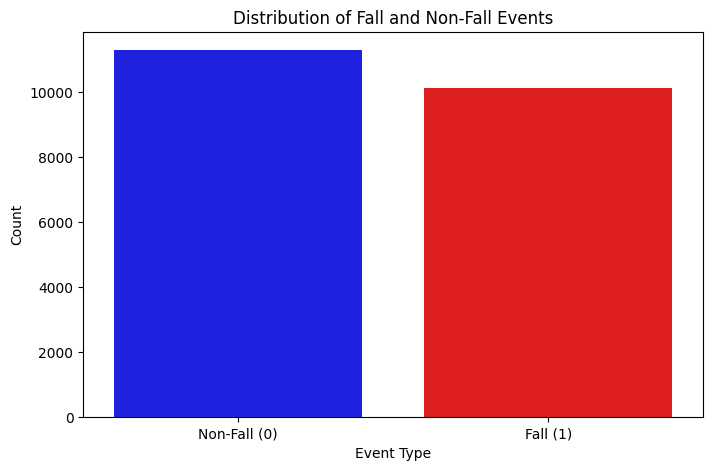

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram (count plot) for fall vs. non-fall events
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Prediction"], palette=["blue", "red"])
plt.xticks([0, 1], ["Non-Fall (0)", "Fall (1)"])
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.title("Distribution of Fall and Non-Fall Events")
plt.show()


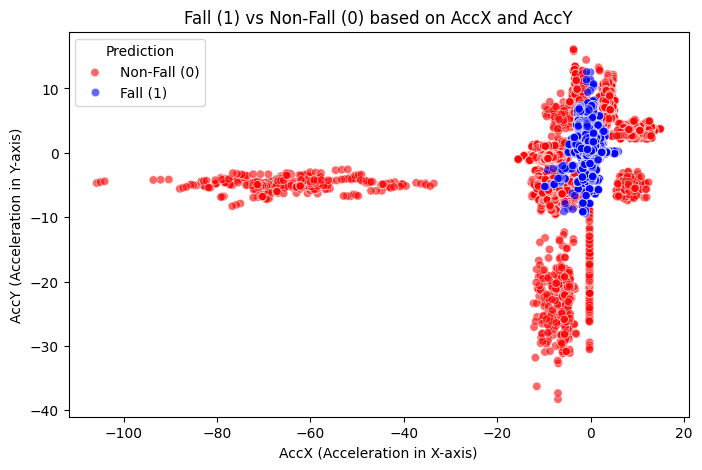

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of AccX vs AccY colored by Prediction
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["AccX"], y=df["AccY"], hue=df["Prediction"], palette=["blue", "red"], alpha=0.6)

plt.xlabel("AccX (Acceleration in X-axis)")
plt.ylabel("AccY (Acceleration in Y-axis)")
plt.title("Fall (1) vs Non-Fall (0) based on AccX and AccY")
plt.legend(title="Prediction", labels=["Non-Fall (0)", "Fall (1)"])
plt.show()


<ipython-input-22-1cb5f0747dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prediction", y=feature, data=df, palette=["red", "blue"])
<ipython-input-22-1cb5f0747dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prediction", y=feature, data=df, palette=["red", "blue"])
<ipython-input-22-1cb5f0747dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prediction", y=feature, data=df, palette=["red", "blue"])
<ipython-input-22-1cb5f0747dbc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will 

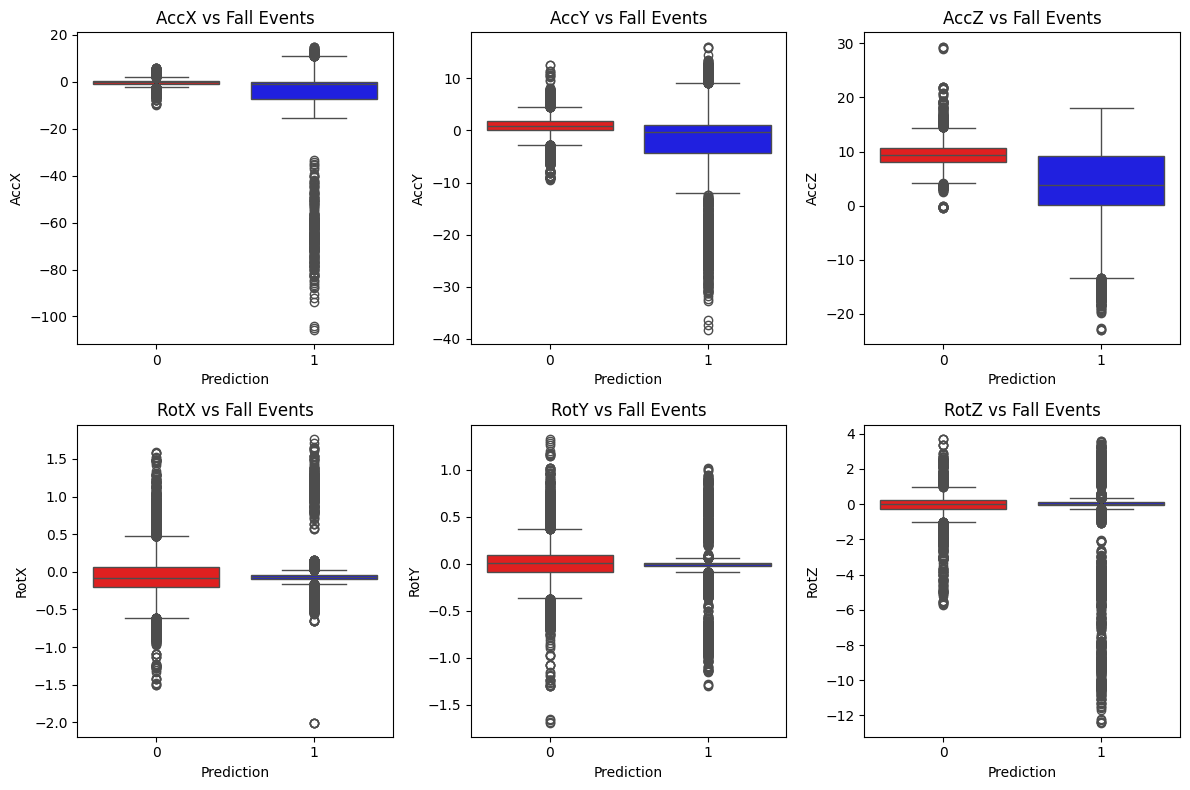

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define sensor features
features = ["AccX", "AccY", "AccZ", "RotX", "RotY", "RotZ"]

# Create subplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(x="Prediction", y=feature, data=df, palette=["red", "blue"])
    plt.title(f"{feature} vs Fall Events")

plt.tight_layout()
plt.show()


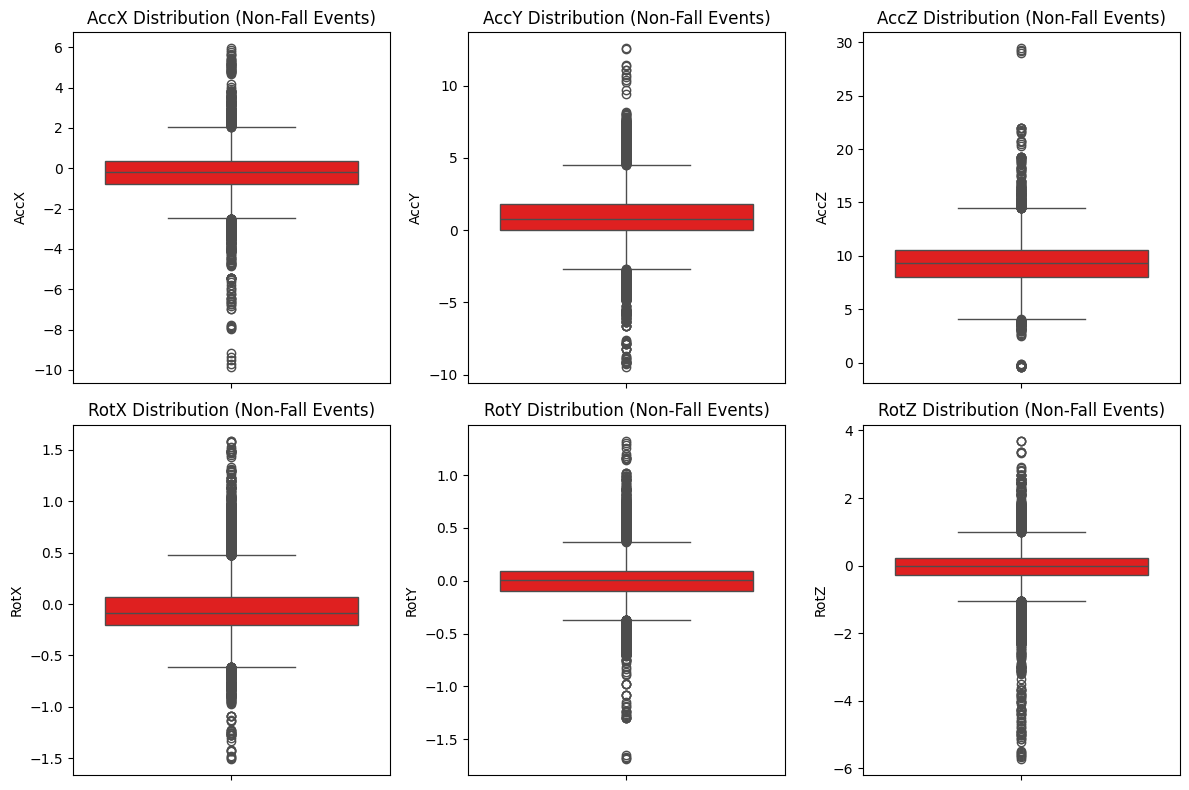

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset for non-fall events
df_non_fall = df[df["Prediction"] == 0]

# Define sensor features
features = ["AccX", "AccY", "AccZ", "RotX", "RotY", "RotZ"]

# Create subplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.boxplot(y=df_non_fall[feature], color="red")
    plt.title(f"{feature} Distribution (Non-Fall Events)")

plt.tight_layout()
plt.show()


In [ ]:
import os
print(os.listdir())


['.config', 'sample_data']
